In [7]:
#Phạm Minh Tuấn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from google.colab import drive

In [8]:
import pandas as pd
# Đọc dữ liệu từ tệp CSV vào DataFrame
ddos = pd.read_csv('/content/drive/MyDrive/APA-DDoS-Dataset.csv')

In [9]:
# Hiển thị toàn bộ DataFrame
ddos

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,8000,6,66,0,0,0,1,...,1,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [10]:
#Hiển thị thông tin về DataFrame
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

In [11]:
#Phân tích dữ liệu
#Kiểm tra giá trị rỗng (hoặc thiếu) trong một bộ dữ liệu là một bước quan trọng trong quá trình tiền xử lý dữ liệu.
#Việc phát hiện và xử lý các giá trị null là cần thiết để tránh bất kỳ hiểu lầm nào.
ddos.isna().sum()

ip.src             0
ip.dst             0
tcp.srcport        0
tcp.dstport        0
ip.proto           0
frame.len          0
tcp.flags.syn      0
tcp.flags.reset    0
tcp.flags.push     0
tcp.flags.ack      0
ip.flags.mf        0
ip.flags.df        0
ip.flags.rb        0
tcp.seq            0
tcp.ack            0
frame.time         0
Packets            0
Bytes              0
Tx Packets         0
Tx Bytes           0
Rx Packets         0
Rx Bytes           0
Label              0
dtype: int64

In [12]:
#Checking for duplicates-> Kiểm tra trùng
ddos.duplicated().sum()

0

In [13]:
#Không có bản sao hoặc giá trị rỗng nào cần phải loại bỏ, vì vậy chúng ta có thể tiếp tục phân tích.
#đếm số lượng mẫu trong mỗi nhãn của tập dữ liệu
ddos.groupby('Label').size()

Label
Benign          75600
DDoS-ACK        37800
DDoS-PSH-ACK    37800
dtype: int64

In [14]:
#Chúng ta có 75,600 mẫu thuộc nhãn 'Benign' và 75,600 mẫu thuộc nhãn 'DDoS attacks
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

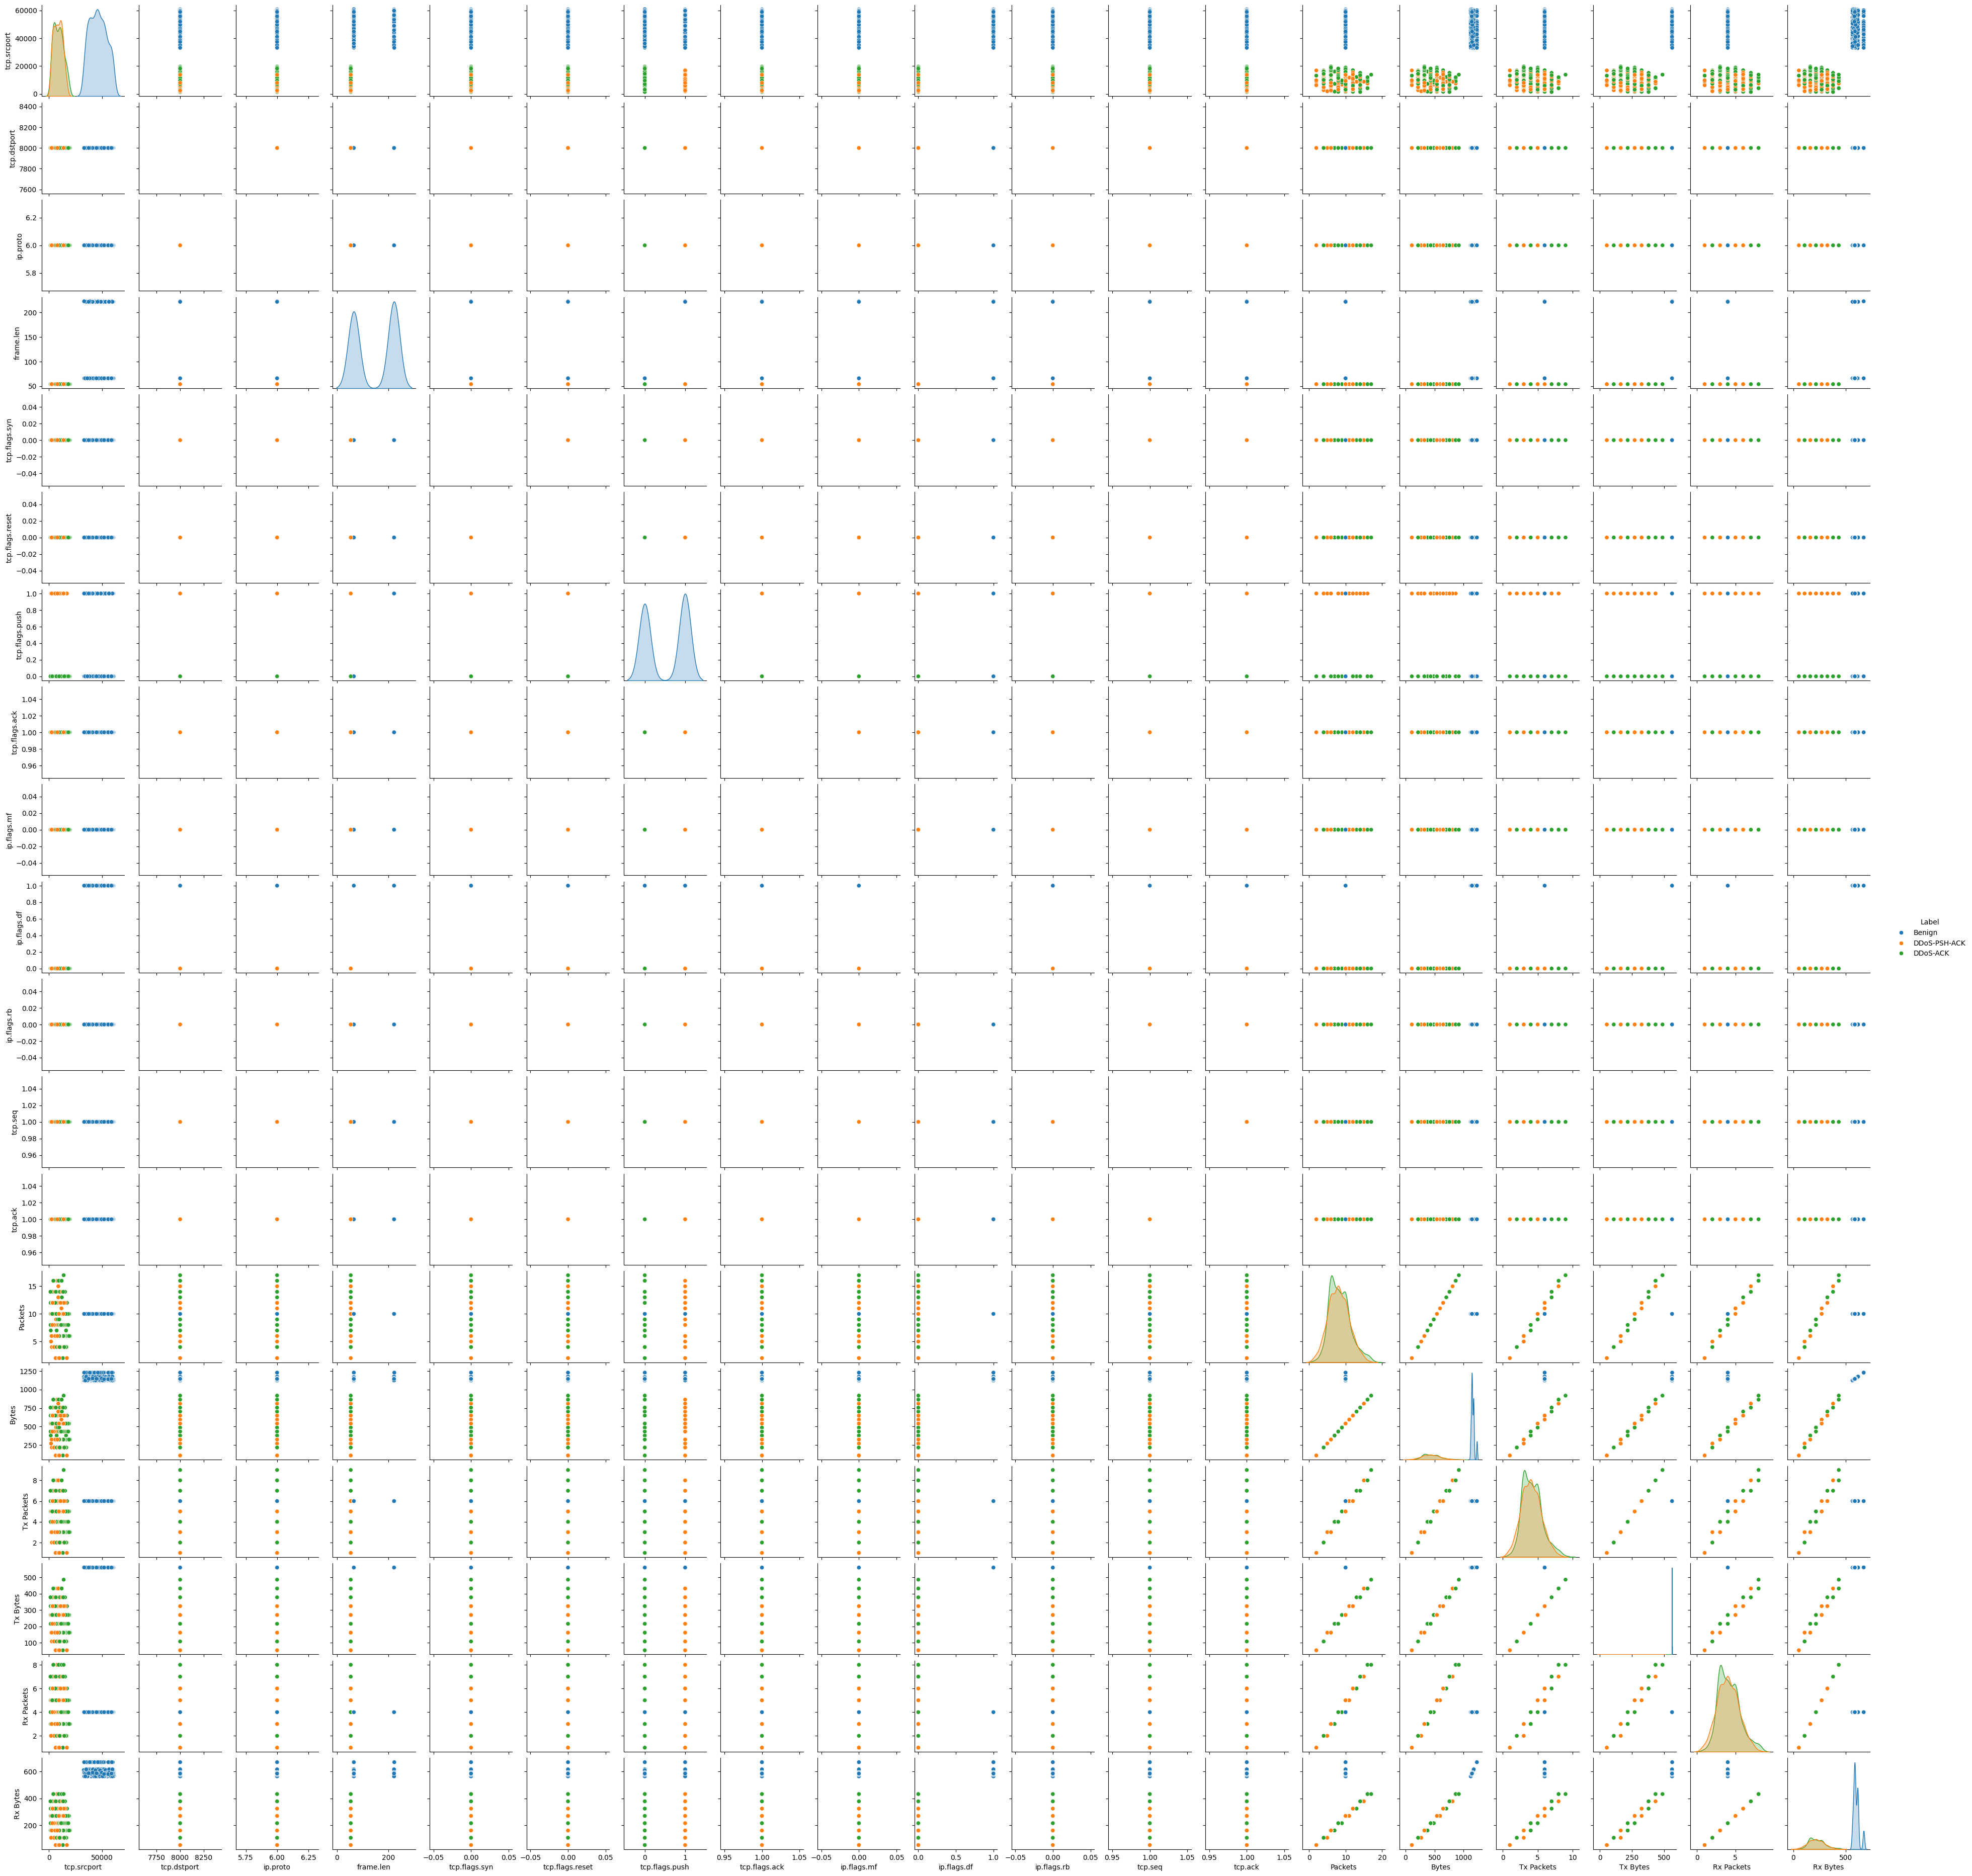

In [15]:
# Đọc dữ liệu từ đường dẫn
ddos = pd.read_csv('/content/drive/MyDrive/APA-DDoS-Dataset.csv')
# Giảm kích thước dữ liệu bằng cách lấy mẫu ngẫu nhiên
sample_data = ddos.sample(n=1000) # Thay đổi số lượng mẫu nếu cần
# Vẽ pairplot
sns.pairplot(sample_data, hue='Label', height=2, diag_kind='kde')
plt.show()

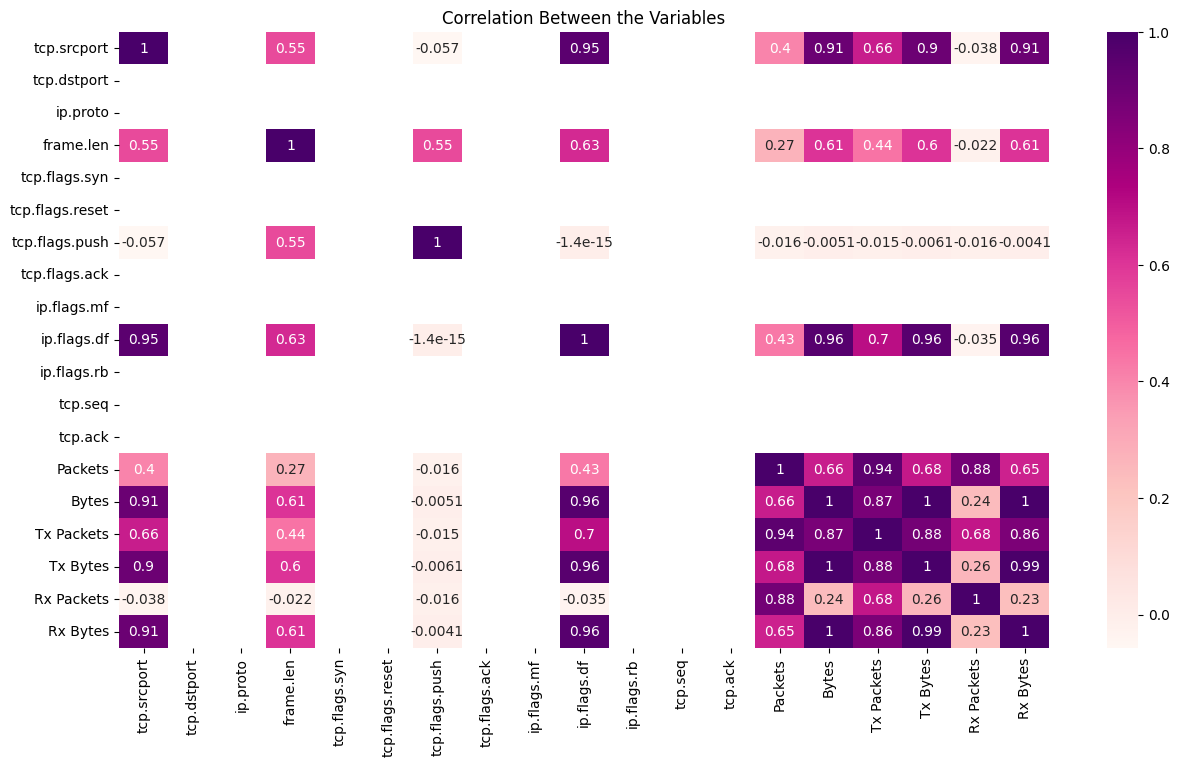

In [16]:
#Bằng cách quan sát pairplot được tạo ra, chúng ta có thể nhận thấy có quá nhiều đặc điểm chỉ có một giá trị duy nhất trên cột, chúng có thể
numeric_data = ddos.select_dtypes(include='number')# select only the columns in the DataFrame data that have numeric (number) data
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax, cmap="RdPu")
plt.title('Correlation Between the Variables')
#plt.xticks(rotation=45);
plt.show()

In [19]:
#Loại bỏ các đặc trưng
#tcp.dstport
#ip.proto
#tcp.flags.syn
#tcp.flags.reset
#tcp.flags.ack
#ip.flags.mf
#ip.flags.rb
#tcp.seq,tcp.ack
columns_to_drop = ['tcp.dstport', 'ip.proto', 'tcp.flags.syn', 'tcp.flags.reset', 'tcp.flags.ack', 'ip.flags.mf', 'ip.flags.rb', 'tcp.seq', 'tcp.ack']
ddos_new= ddos.drop(columns=columns_to_drop).copy()
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,16-Jun 2020 22:10:46.923006000 Mountain Dayli...,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,16-Jun 2020 22:10:46.935672000 Mountain Dayli...,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,16-Jun 2020 22:10:46.957469000 Mountain Dayli...,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,16-Jun 2020 22:10:46.970971000 Mountain Dayli...,10,1175,6,560,4,615,Benign


In [20]:
#Chúng ta cũng không cần cột frame.time
ddos_new= ddos_new.drop(columns=['frame.time'])
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS-PSH-ACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


In [21]:
#Chuẩn hóa dữ liệu
# Assuming your DataFrame is named df
ddos_new['Label_new'] = ddos_new['Label'].apply(lambda x: 'Benign' if x == 'Benign' else 'DDoS')
ddos_new.drop(columns=['Label'], inplace=True)
ddos_new.rename(columns={'Label_new': 'Label'}, inplace=True)
ddos_new

,ip.src,ip.dst,tcp.srcport,frame.len,tcp.flags.push,ip.flags.df,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,54,1,0,8,432,4,216,4,216,DDoS
1,192.168.1.1,192.168.23.2,2413,54,1,0,10,540,5,270,5,270,DDoS
2,192.168.1.1,192.168.23.2,2414,54,1,0,12,648,6,324,6,324,DDoS
3,192.168.1.1,192.168.23.2,2415,54,1,0,10,540,5,270,5,270,DDoS
4,192.168.1.1,192.168.23.2,2416,54,1,0,6,324,3,162,3,162,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151195,192.168.19.1,192.168.23.2,37360,66,0,1,10,1146,6,560,4,586,Benign
151196,192.168.19.1,192.168.23.2,37362,66,0,1,10,1151,6,560,4,591,Benign
151197,192.168.19.1,192.168.23.2,37364,66,0,1,10,1144,6,560,4,584,Benign
151198,192.168.19.1,192.168.23.2,37366,66,0,1,10,1175,6,560,4,615,Benign


In [22]:
y = ddos_new['Label']
y

0           DDoS
1           DDoS
2           DDoS
3           DDoS
4           DDoS
           ...  
151195    Benign
151196    Benign
151197    Benign
151198    Benign
151199    Benign
Name: Label, Length: 151200, dtype: object

In [23]:
#chuẩn hóa Y
#Vì giờ chỉ còn 2 lớp
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [24]:
#Có nhiều địa chỉ IP nên chúng ta cần mã hóa chúng bằng cách sử dụng mã hóa one-hot. Không có tính tuân thứ nên việc sử dụng mã hóa nhãn có
X = ddos_new.drop(columns=['Label']).copy()
categorical_columns = ['ip.src', 'ip.dst']# Select categorical columns for one-hot encoding
# Create a ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[
('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)
],
remainder='passthrough'
)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])# Create a pipeline
X_encoded = pipeline.fit_transform(X)# Fit and transform
# Get the column names after encoding
encoded_column_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_columns)
column_names = list(encoded_column_names) + list(X.columns.difference(categorical_columns))
X = pd.DataFrame(X_encoded, columns=column_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# Split the data into training and testing sets
X_train

,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


In [29]:
y_train

class_counts = np.bincount(y_train)
print(f'Count for class 0 (Benign): {class_counts[0]}')
print(f'Count for class 1 (DDoS): {class_counts[1]}')

#Building the Model
X_train

Count for class 0 (Benign): 60431
Count for class 1 (DDoS): 60529


,ip.src_192.168.1.1,ip.src_192.168.10.1,ip.src_192.168.11.1,ip.src_192.168.13.1,ip.src_192.168.14.1,ip.src_192.168.16.1,ip.src_192.168.17.1,ip.src_192.168.19.1,ip.src_192.168.2.1,ip.src_192.168.20.1,...,Bytes,Packets,Rx Bytes,Rx Packets,Tx Bytes,Tx Packets,frame.len,ip.flags.df,tcp.flags.push,tcp.srcport
39462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,34562.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
86399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13220.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
46424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40372.0,223.0,1.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
123679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54482.0,66.0,0.0,1.0,10.0,1170.0,6.0,560.0,4.0,610.0
23643,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5706.0,54.0,1.0,0.0,8.0,432.0,4.0,216.0,4.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46882.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6153.0,54.0,0.0,0.0,10.0,540.0,5.0,270.0,5.0,270.0
131932,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,46358.0,66.0,0.0,1.0,10.0,1229.0,6.0,561.0,4.0,668.0
146867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,56936.0,66.0,0.0,1.0,10.0,1151.0,6.0,560.0,4.0,591.0


Decision Tree Accuracy: 100.00%


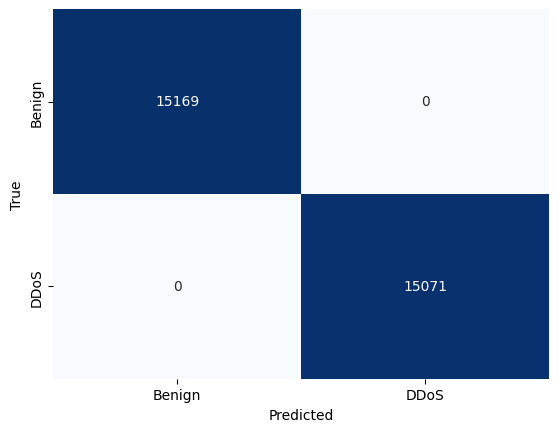

In [31]:
#Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred_decision_tree)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Accuracy: 100.00%


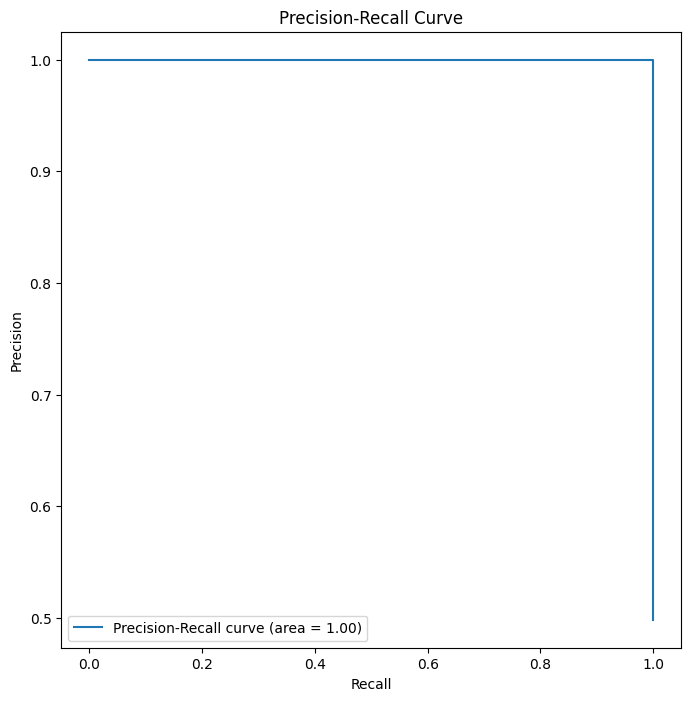

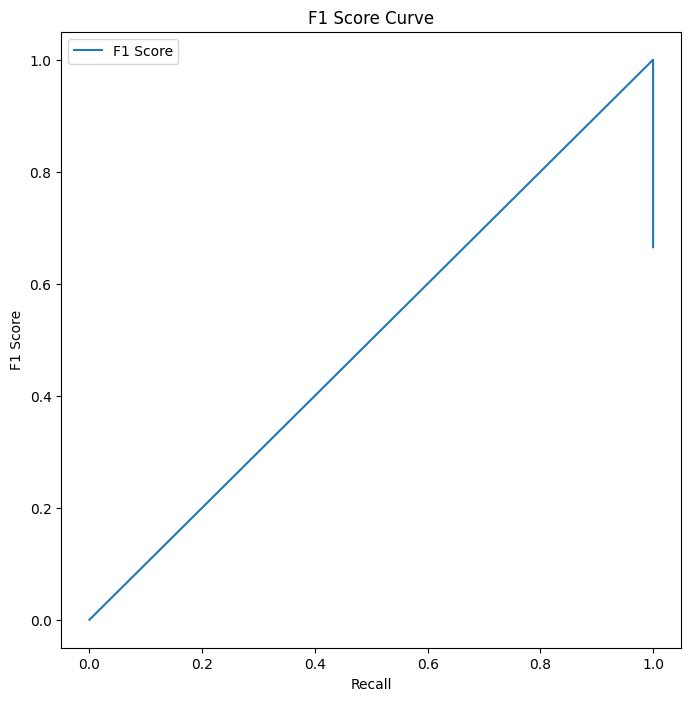

In [32]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)# predict
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Plot precision-recall curve
fig, ax = plt.subplots(figsize=(8, 8))
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
area = auc(recall, precision)
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {area:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
# Plot F1 score
fig, ax = plt.subplots(figsize=(8, 8))
f1 = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1, label='F1 Score')
plt.xlabel('Recall')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend(loc='best')
plt.show()

Accuracy: 100.00%


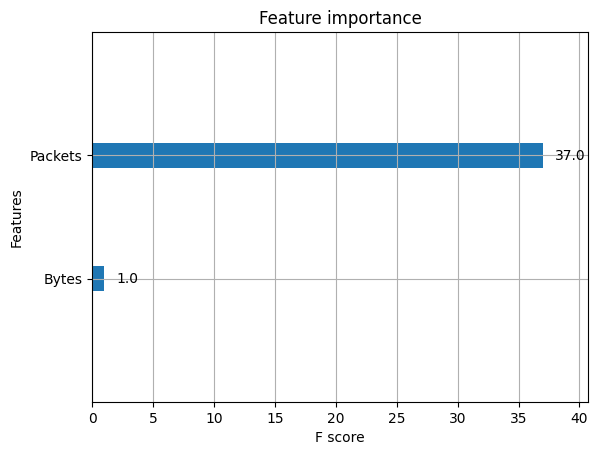

In [34]:
#Khu vực đồ thị độ chính xác-recall là 1, điều này thường cho thấy rằng mô hình hoạt động rất tốt về mặt độ chính xác và độ phủ.
#Đường cong điểm F1 là một đường thẳng có độ dốc là 45 độ, cho thấy rằng mô hình đang đạt được sự cân bằng hợp lý giữa độ chính xác và độ ph
#Kết quả này là tích cực và cho thấy khả năng tổng quát tốt
#Thuật toán XGBOOST
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Đồ thị thể hiện các đặc trưng
plot_importance(xgb_model)
plt.show()

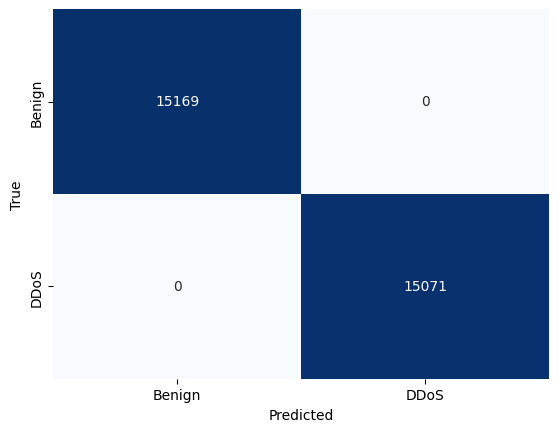

In [35]:
#"Gói tin" (Packets) là đặc trưng quan trọng nhất khi đưa ra quyết định.
#Bây giờ hãy vẽ đồ thị về ma trận (confusion matrix). Chúng ta có độ chính xác 100%, vì vậy không có sự chênh lệch
cm = confusion_matrix(y_test, y_pred)
class_labels = ["Benign", "DDoS"]
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()